### Imports and Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

### Retrieving Data

In [2]:
# Retrieving data files
unemployment_path = "../output_data/clean_filter/australia_emp.csv"
departures_data_path = "../output_data/clean_data/tourism_dep_clean.csv"

# Reading in the data
unemployment_df = pd.read_csv(unemployment_path)
departures_df = pd.read_csv(departures_data_path)

In [3]:
# Displaying the data for preview
unemployment_df

,Unnamed: 0,Date,Month,Year,Australia ; Unemployment rate ; Persons ;,Australia ; Unemployment rate ; > Males ;,Australia ; Unemployment rate ; > Females ;
0,0,Jul-91,Jul,1991,9.5,9.9,8.9
1,1,Aug-91,Aug,1991,9.5,10.1,8.5
2,2,Sep-91,Sep,1991,10.0,10.4,9.4
3,3,Oct-91,Oct,1991,9.4,9.9,8.7
4,4,Nov-91,Nov,1991,9.6,10.0,8.9
...,...,...,...,...,...,...,...
348,348,Jul-20,Jul,2020,7.4,7.5,7.3
349,349,Aug-20,Aug,2020,6.8,7.1,6.6
350,350,Sep-20,Sep,2020,6.8,7.1,6.3
351,351,Oct-20,Oct,2020,6.7,6.7,6.6


In [4]:
# Displaying the data for preview
departures_df

,Unnamed: 0,Australia,Norfolk Island,Australian External Territories nec,New Zealand,New Caledonia,Papua New Guinea,Solomon Islands,Vanuatu,Guam,...,Seychelles,Somalia,South Africa,Eswatini,Tanzania,Uganda,Zambia,Zimbabwe,"S & E Afr, nec",Inadequately Described
0,Sep-2016,"866,140",0,0,"155,740",0,"3,590",520,260,0,...,30,10,"5,190",10,70,80,110,420,0,"1,340"
1,Oct-2016,"701,180",0,0,"186,450",0,"3,150",480,420,0,...,30,10,"5,510",0,60,70,80,370,0,"4,440"
2,Nov-2016,"655,800",0,0,"150,930",0,"3,590",610,340,0,...,30,10,"5,330",0,70,70,110,510,0,"1,750"
3,Dec-2016,"956,990",0,0,"179,880",0,"4,610",880,710,0,...,70,20,"7,230",10,150,150,160,830,0,650
4,Jan-2017,"732,790",0,0,"164,000",0,"4,740",610,640,0,...,90,10,"10,010",0,80,70,110,610,0,240
5,Feb-2017,"540,330",0,0,"122,510",0,"2,580",340,430,0,...,30,10,"4,410",0,50,30,100,370,0,470
6,Mar-2017,"665,680",0,0,"143,840",0,"3,070",470,340,0,...,30,10,"4,990",10,60,50,110,360,0,"1,190"
7,Apr-2017,"809,460",0,0,"163,170",0,"3,260",470,450,0,...,40,10,"7,190",10,80,60,80,530,0,"1,440"
8,May-2017,"737,500",0,0,"142,080",0,"2,720",490,640,0,...,30,10,"4,990",10,50,60,100,450,0,770
9,Jun-2017,"875,110",0,0,"144,270",0,"3,210",540,390,0,...,30,10,"4,260",0,50,60,100,360,0,950


### Cleaning Data

In [5]:
# Cutting unemployment_df to only contain the same date range as departures_df
# Limiting from row 302 to 353 to contain monthly data from Sep 2016, to Nov 2020
# Also limiting the columns to what is recquired
unemployment_valid_dates = unemployment_df.iloc[302:353, 1:5]
unemployment_valid_dates.head()

,Date,Month,Year,Australia ; Unemployment rate ; Persons ;
302,Sep-16,Sep,2016,5.5
303,Oct-16,Oct,2016,5.3
304,Nov-16,Nov,2016,5.4
305,Dec-16,Dec,2016,5.6
306,Jan-17,Jan,2017,6.1


In [6]:
# Resetting index
unemployment_valid_dates = unemployment_valid_dates.reset_index(drop=True)
unemployment_valid_dates.head()

,Date,Month,Year,Australia ; Unemployment rate ; Persons ;
0,Sep-16,Sep,2016,5.5
1,Oct-16,Oct,2016,5.3
2,Nov-16,Nov,2016,5.4
3,Dec-16,Dec,2016,5.6
4,Jan-17,Jan,2017,6.1


In [7]:
# Renaming Column
unemployment_clean = unemployment_valid_dates.rename(columns = {f"{unemployment_df.columns[4]}":
                                                                "Australian Unemployment rate: Persons"})

In [8]:
# Previewing data
unemployment_clean.head()

,Date,Month,Year,Australian Unemployment rate: Persons
0,Sep-16,Sep,2016,5.5
1,Oct-16,Oct,2016,5.3
2,Nov-16,Nov,2016,5.4
3,Dec-16,Dec,2016,5.6
4,Jan-17,Jan,2017,6.1


In [9]:
# Cleaning departures_df
# Only require first two rows 
departures = departures_df.iloc[:, 0:2]
departures.head()

,Unnamed: 0,Australia
0,Sep-2016,"866,140"
1,Oct-2016,"701,180"
2,Nov-2016,"655,800"
3,Dec-2016,"956,990"
4,Jan-2017,"732,790"


In [10]:
# Renaming column
departures = departures.rename(columns={"Australia": "National Arrivals of Australian Citizens", 
                                        "Unnamed: 0": "Flight Month"})
departures.head()

,Flight Month,National Arrivals of Australian Citizens
0,Sep-2016,"866,140"
1,Oct-2016,"701,180"
2,Nov-2016,"655,800"
3,Dec-2016,"956,990"
4,Jan-2017,"732,790"


In [11]:
# Converting data type of 'National Arrivals of Australian Citizens' column 
# First converting column of objects to strings
departures["National Arrivals of Australian Citizens"] = departures["National Arrivals of Australian Citizens"].astype('str')


In [12]:
# Then removing the commas and converting the data type to float
departures["National Arrivals of Australian Citizens"] = departures["National Arrivals of Australian Citizens"].str.replace(",","").astype(float)


In [13]:
# Confirming datatype
departures.dtypes

Flight Month                                 object
National Arrivals of Australian Citizens    float64
dtype: object

In [14]:
# Previewing dataframe
departures.head()

,Flight Month,National Arrivals of Australian Citizens
0,Sep-2016,866140.0
1,Oct-2016,701180.0
2,Nov-2016,655800.0
3,Dec-2016,956990.0
4,Jan-2017,732790.0


## Merging DataFrames

In [15]:
# Merging the two dataframes on index
merged_df = pd.merge(unemployment_clean, departures, left_index=True, right_index=True)
merged_df.head()

,Date,Month,Year,Australian Unemployment rate: Persons,Flight Month,National Arrivals of Australian Citizens
0,Sep-16,Sep,2016,5.5,Sep-2016,866140.0
1,Oct-16,Oct,2016,5.3,Oct-2016,701180.0
2,Nov-16,Nov,2016,5.4,Nov-2016,655800.0
3,Dec-16,Dec,2016,5.6,Dec-2016,956990.0
4,Jan-17,Jan,2017,6.1,Jan-2017,732790.0


## Plotting

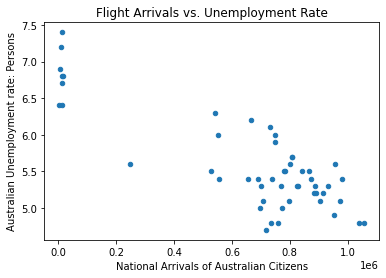

In [16]:
# Plotting data following confirmation that the two required columns are listed in corresponding order
graph = merged_df.plot(kind = "scatter", x = "National Arrivals of Australian Citizens", 
                       y = "Australian Unemployment rate: Persons", title = "Flight Arrivals vs. Unemployment Rate")


In [17]:
# seems x axis has been converted to scientific notation 

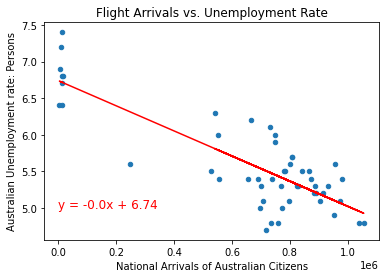

The correlation coefficient is: r = -0.8316.
The r squared value is: 0.6915.


In [18]:
# Calculating linear regression 

# Plotting the scatterplot
graph = merged_df.plot(kind = "scatter", x = "National Arrivals of Australian Citizens", 
                       y = "Australian Unemployment rate: Persons", title = "Flight Arrivals vs. Unemployment Rate")

#Setting variables
x_value = merged_df["National Arrivals of Australian Citizens"]
y_value = merged_df["Australian Unemployment rate: Persons"]

# Calculating the regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the regression line
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(0,5), fontsize=12,color="red")

# Show plot
plt.show()

# Printing r value
print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")

# Printing r squared value
print(f"The r squared value is: {round(rvalue**2, 4)}.")

# Saving image
#plt.savefig()


The above scatterplot shows the relationship between National Arrivals of Australian Citizens and Australian Unemployment rate: Persons, focusing only on data acquired between September 2016 and November 2020. The correlation coefficient of r = -0.8316 shows there is a strong, negative, linear relationship between the two variables. The negative relationship means that as the national arrivals of Australian citizens increases, the unemployment rate decreases. The r squared value indicates that within this regression model, 69% of the variation in Australian Unemployment rate: Persons can be explained by the variation in National Arrivals of Australian Citizens.